In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [7]:
data=pd.read_csv("AirPassengers.csv")

In [8]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [9]:
len(data)

144

In [10]:
type(data)

pandas.core.frame.DataFrame

In [11]:
data=data["#Passengers"]
data.head()

0    112
1    118
2    132
3    129
4    121
Name: #Passengers, dtype: int64

In [12]:
data=np.array(data).reshape(-1,1)

In [13]:
type(data)

numpy.ndarray

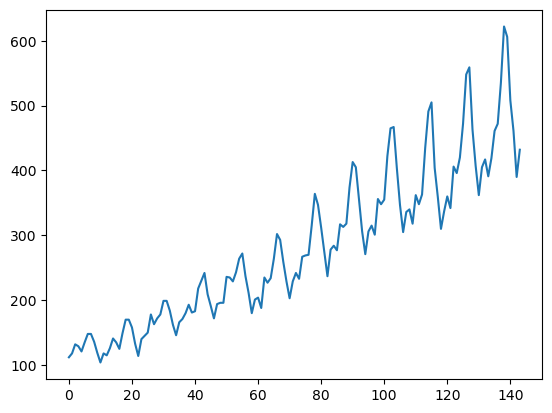

In [14]:
plt.plot(data)
plt.show()

In [15]:
sc=MinMaxScaler()

In [16]:
data=sc.fit_transform(data)

In [17]:
train=data[0:100,:]
test=data[100:,:]

In [19]:
def veri(data,steps):
    datax=[]
    datay=[]
    for i in range(len(data)-steps-1):
        a=data[i:(i+steps),0]
        datax.append(a)
        datay.append(data[i+steps,0])
    return np.array(datax),np.array(datay)

In [20]:
steps=3

In [21]:
xtrain,ytrain=veri(train,steps)
xtest,ytest=veri(test,steps)

In [25]:
xtrain=np.reshape(xtrain,(xtrain.shape[0],1,xtrain.shape[1]))
xtest=np.reshape(xtest,(xtest.shape[0],1,xtest.shape[1]))

In [27]:
model=Sequential()
model.add(LSTM(128,input_shape=(1,steps)))
model.add(Dense(63))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

C:\Users\HUAWEI\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          67,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 63)                  │           8,127 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              64 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,775 (296.00 KB)

 Trainable params: 75,775 (296.00 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.fit(xtrain,ytrain,epochs=25,batch_size=1)

Epoch 1/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0109
Epoch 2/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039   
Epoch 3/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034
Epoch 4/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0035   
Epoch 5/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0038
Epoch 6/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0030   
Epoch 7/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020   
Epoch 8/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0044
Epoch 9/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027
Epoch 10/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0033   
Epoch 11/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0029
Epoch 12/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027   
Epoch 13/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025   
Epoch 14/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0029
Epoch 15/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.002

In [30]:
ypred=model.predict(xtest)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 293ms/step


In [31]:
ypred=sc.inverse_transform(ypred)
ytest=ytest.reshape(-1,1)
ytest=sc.inverse_transform(ytest)

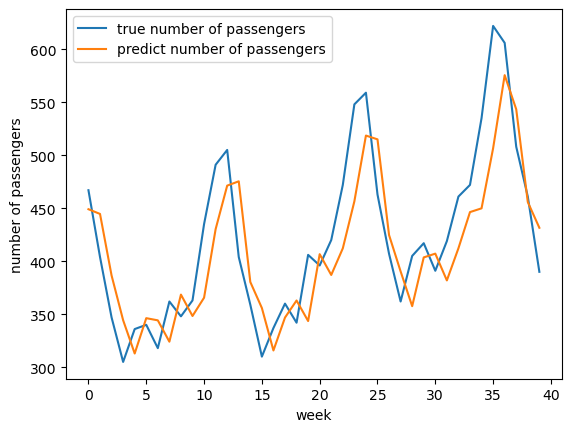

In [32]:
plt.plot(ytest,label="true number of passengers")
plt.plot(ypred,label="predict number of passengers")
plt.xlabel("week")
plt.ylabel("number of passengers")
plt.legend()
plt.show()